In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
from scipy import stats

#Sure, millenials love their Avocados, but how much?! (Over-arching question)
    #Using region, research percantage of millenials vs boomers, gen x etc, and see how sales(total volume) 
    #are impacted
 
#How much are millenials willing to pay for their precious green fruit?
    #Average price per avocado vs volume in certain regions

data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)

#Clean up certain names, some of the data wasn't titled the way I liked, this changed that.
df['region'] = df['region'].str.replace("BaltimoreWashington", "Baltimore")
df['region'] = df['region'].str.replace("BuffaloRochester", "Buffalo")
df['region'] = df['region'].str.replace("CincinnatiDayton", "Cincinnati")
df['region'] = df['region'].str.replace("DallasFtWorth", "Dallas")
df['region'] = df['region'].str.replace("HarrisburgScranton", "Harrisburg")
df['region'] = df['region'].str.replace("HartfordSpringfield", "Hartford")
df['region'] = df['region'].str.replace("MiamiFtLauderdale", "Miami")
df['region'] = df['region'].str.replace("NewOrleansMobile", "NewOrleans")
df['region'] = df['region'].str.replace("PhoenixTucson", "Phoenix")
df['region'] = df['region'].str.replace("RaleighGreensboro", "Raleigh")
df['region'] = df['region'].str.replace("RichmondNorfolk", "Richmond")
df['region'] = df['region'].str.replace("WestTexNewMexico", "NewMexico")


#Remove the data I don't want (States, regions, and totals, only want cities)
#this removes specifc parts of columns, for example here im removing certain states from the 'region' column
#df=df[np.logical_not(df['column you want to access here'].isin(["data in the column you want gone"]))]

df=df[np.logical_not(df['region'].isin(["West", 'California', 'TotalUS', 'Plains', 'Southeast', 'SouthCentral', 'Northeast', 'Midsouth', 'GreatLakes']))]


In [2]:
df.groupby('region')['AveragePrice'].mean()
df.type[df.type == 'organic'] = 1
df.type[df.type == 'conventional'] = 0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df['type'] = df['type'].astype(int)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [4]:
dfb = df.groupby('region')['Total Volume'].mean()
dfa = df.groupby('region')['AveragePrice'].mean()
dfc = df.groupby('region')['4770'].mean()
dfd = df.groupby('region')['Large Bags'].mean()
dfe = df.groupby('region')['type'].mean()
dff = df.groupby('region')['4046'].mean()
dfg = df.groupby('region')['4225'].mean()

In [5]:
avocado = pd.DataFrame()
avocado['price'] = dfa
avocado['volume'] = dfb
avocado['4770'] = dfc
avocado['large'] = dfd
avocado['4046'] = dff
avocado['4225'] = dfg

In [6]:
#Lets drop some outliers here
avocado = avocado.mask((avocado - avocado.mean()).abs() > 3 * avocado.std()).dropna()
avocado.head()

,price,volume,4770,large,4046,4225
region,,,,,,
Albany,1.561036,47537.869734,162.832337,1153.496213,1824.081775,37621.208254
Atlanta,1.337959,262145.322041,311.385769,32070.044556,146116.867959,31218.510385
Baltimore,1.534231,398561.891479,12466.730976,2903.984586,35656.218166,245982.888876
Boise,1.348136,42642.567308,3186.787840,2103.634083,20019.507604,3461.682367
Boston,1.530888,287792.854527,4982.294970,4438.364704,4994.610059,214219.864290


In [7]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [8]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = avocado['price'].values.reshape(-1, 1)
X = avocado[['4770', '4225', '4046']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-6.17631717e-06  1.26670664e-06 -9.99283188e-07]]

Intercept: 
 [1.42533675]

R-squared:
0.43331946040844105


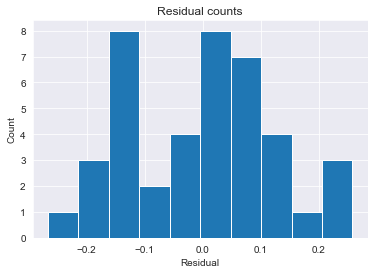

In [9]:
predicted = regr.predict(X).ravel()
actual = avocado['price']

sns.set_style('darkgrid')
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


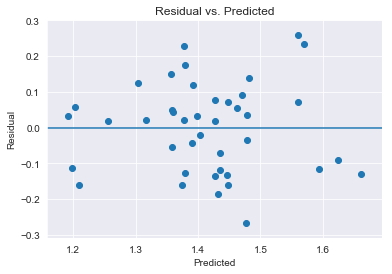

In [10]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [11]:
correlation_matrix = X.corr()
display(correlation_matrix)

,4770,4225,4046
4770,1.000,0.396,0.334
4225,0.396,1.000,0.231
4046,0.334,0.231,1.000


In [12]:
price = avocado.price
high = avocado['4770']
medium = avocado['4225']
low = avocado['4046']

In [13]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'price ~ high+medium+low'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=avocado).fit()

In [14]:
lm.pvalues

Intercept   0.000
high        0.150
medium      0.001
low         0.000
dtype: float64

In [18]:
avocado['4770'] = avocado['4770'].astype(int)
avocado['4225'] = avocado['4225'].astype(int)
avocado['4046'] = avocado['4046'].astype(int)

avocado['price'] = dfa*100
avocado['price'] = avocado['price'].astype(int)
avocado['price'].#head()

region
Albany       156
Atlanta      133
Baltimore    153
Boise        134
Boston       153
Name: price, dtype: int64

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier


neighbors = KNeighborsClassifier(n_neighbors=1)
X = avocado[['4225', '4046']]
Y = avocado.price
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

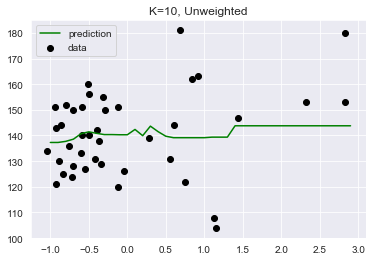

In [76]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
X = pd.DataFrame({
    '4225': stats.zscore(avocado['4225']),
})
Y = avocado.price
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(-1, 3, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

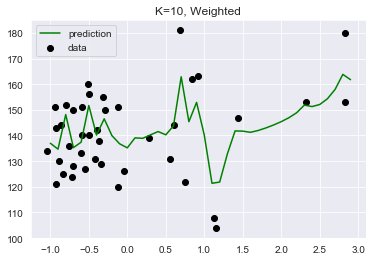

In [77]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=14, weights='distance')
X = pd.DataFrame({
    '4225': stats.zscore(avocado['4225']),
                  })
Y = avocado.price
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(-1, 3, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [78]:
#lets validate the 2 graphs

from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.14 (+/- 0.36)
Weighted Accuracy: -0.49 (+/- 0.16)


In [79]:
#When all is said and done it looks like this data doesn't mesh well with these models